# **ALERT**

You may skip "0.1" and "1.1" Since the clean data is already made. 🌝

# 0. Import Modules and Setup

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

## >0.1 Convert Large Data Files Into Feather File

In [3]:
# # Load the three CSV files
# df1 = pd.read_csv('data/horses.csv', low_memory=False)
# df2 = pd.read_csv('data/horses1.csv', low_memory=False)
# df3 = pd.read_csv('data/horses2.csv', low_memory=False)

# # Concatenate the three DataFrames
# df = pd.concat([df1, df2, df3])
# df.reset_index(drop=True, inplace=True)

# # Convert Row column to Str, avoids error
# df['Row'] = df['Row'].astype(str)

# # Save the concatenated DataFrame as a feather file
# df.to_feather('data/horses.feather')

# >1. Data PreProcessing

Hassan Kamran. (2022). <i>Historic Australian Horse Racing Dataset</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/2306807

In [4]:
# Load in data
horse_data_raw = pd.read_feather('data/horses.feather')

In [5]:
# View nulls
# null_percetnages = horse_data_raw.isna().mean() * 100

# null_percetnages.to_csv('null_percentages.csv')

In [6]:
# Extract Relevant Features
horse_data_extracted = horse_data_raw[['Winner', 'StartingOdds', 'RecentWinPercent', 'Class', 'laststart', 'Age', 'Colour', 'Sex', 'Sire']]

In [7]:
horse_data_extracted.head()

,Winner,StartingOdds,RecentWinPercent,Class,laststart,Age,Colour,Sex,Sire
0,1.0,2.4,NaN,NaN,NaN,4,BAY,GELDING,CAMMIBEST USA
1,0.0,18.1,NaN,NaN,NaN,5,BROWN/BLACK,GELDING,ALLAMERICAN INGOT USA
2,0.0,6.0,NaN,NaN,NaN,6,BLACK,GELDING,WASHINGTON VC USA
3,0.0,7.4,NaN,NaN,NaN,5,BROWN/BLACK,GELDING,ELSU NZ
4,0.0,53.1,NaN,NaN,NaN,7,BAY,GELDING,REAL DESIRE USA


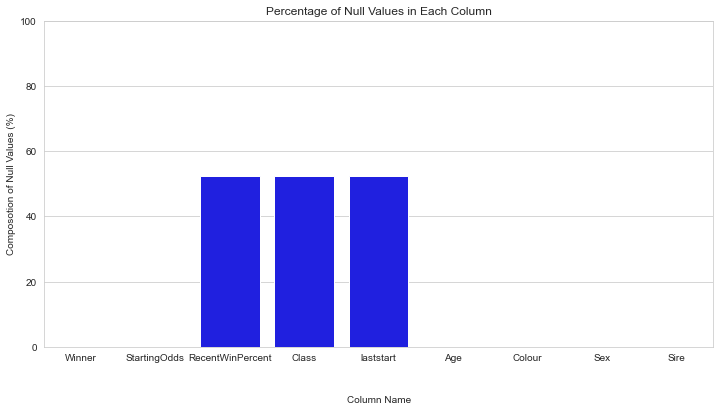

In [8]:
null_percentages = horse_data_extracted.isna().mean() * 100

# Create a bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x=null_percentages.index, y=null_percentages.values, color='blue', orient='v')
plt.title('Percentage of Null Values in Each Column')
plt.xlabel('Column Name')
plt.ylabel('Composotion of Null Values (%)')
plt.ylim(0, 100)

ax.xaxis.set_label_coords(0.5, -0.15)

It seems "RecentWinPercent', 'Class', and 'laststart' have ~ 50% missing nullvalues

In [9]:
print(f"Rows: {horse_data_extracted.shape[0]}")

Rows: 1220095


Since there are plenty of rows to work with, we will remove all rows with null values

In [10]:
horse_data_nonull = horse_data_extracted.dropna()

print(f"Row count after removing null value rows: {horse_data_nonull.shape[0]}")

Row count after removing null value rows: 579580


In [11]:
horse_data_nonull["Winner"].unique()

array([1., 0.])

In [12]:
# Convert 'Winner' column to integer using .loc
horse_data_nonull.loc[:, 'Winner'] = horse_data_nonull['Winner'].astype(int)

In [13]:
horse_data_nonull["Winner"].unique()

array([1, 0])

In [14]:
# TODO: Analyse "Age", "Color", "Sex" and "Sire" as categorical features. For now, only use numerical features

In [15]:
corr_matrix = horse_data_nonull.corr()
print(corr_matrix["Winner"])

Winner              1.000000
StartingOdds       -0.223145
RecentWinPercent    0.155096
Class               0.165051
laststart          -0.413778
Age                -0.085736
Name: Winner, dtype: float64


Age column can be dropped. Keep the rest

In [16]:
selected_cols = ["Winner", "StartingOdds", "RecentWinPercent", "Class", "laststart"]
horse_data_selected = horse_data_nonull[selected_cols]

Save selected data to feather

In [17]:
horse_data_selected.reset_index(drop=True, inplace=True)
horse_data_selected.to_feather("cleaned_data.feather")

# >2. Exploratory Data Analysis

In [18]:
df = pd.read_feather("cleaned_data.feather")

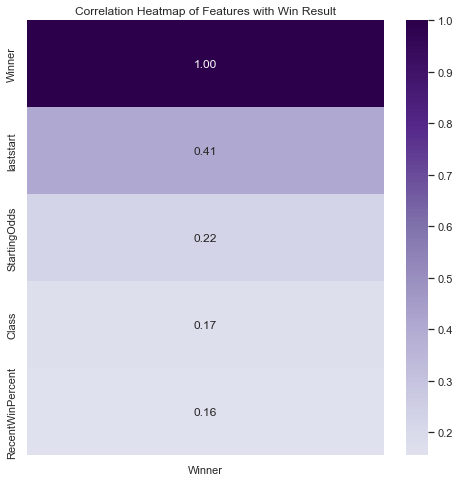

In [19]:
# Get correlation Values
corr_with_winner = df.corr()["Winner"].abs().sort_values(ascending=False)

#Load Heatmap
sns.set(style="white")
plt.figure(figsize=(8, 8))
sns.heatmap(corr_with_winner.to_frame(), cmap='PuOr', center=0, annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Features with Win Result")
plt.show()

# >3. Model Building

In [20]:
# Split the dataset into features and target
X = df.drop("Winner", axis=1)
y = df['Winner']


In [21]:
# Standardise Training Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## >3.1 Logistic Regression (baseline)

In [22]:
# build the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# build the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
;

''

In [23]:
# evaluate the model
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    102950
           1       0.75      0.45      0.56     12966

    accuracy                           0.92    115916
   macro avg       0.84      0.72      0.76    115916
weighted avg       0.91      0.92      0.91    115916



## >3.2 Random Forest Classifier

In [24]:
# Define the model
rfc = RandomForestClassifier()

# Train the model
rfc.fit(X_train, y_train)

# Evaluate the model on the test set
rfc_score = rfc.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", rfc_score)

Random Forest Classifier Accuracy: 0.9561061458297387


## >3.3 Support Vector Machine

In [25]:
# from sklearn.svm import SVC

# # Define the model
# svm = SVC()

# # Train the model
# svm.fit(X_train, y_train)

# # Evaluate the model on the test set
# svm_score = svm.score(X_test, y_test)
# print("Support Vector Machine Accuracy:", svm_score)

## >3.4 Gradient Boost Classifier

In [26]:
# Build the Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier()

# Train the model on the training set
gb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
gb_classifier_score = gb_classifier.score(X_test, y_test)
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

Accuracy: 0.9575986058870216


# >3.5 Naive Bayes Classifier

In [30]:
# create an instance of the model
nb = GaussianNB()

# fit the model to the data
nb.fit(X_train, y_train)

# predict on the test set
y_pred = nb.predict(X_test)

# evaluate the performance of the model
nb_score = nb.score(X_test, y_test)
print("Accuracy:", nb_score)

Accuracy: 0.8808102418993063


# >4 Evaluation of Models

In [41]:
# Set up vars
log_reg_score = log_reg.score(X_test, y_pred)

scores = [log_reg_score, rfc_score, gb_classifier_score, nb_score]
rounded_scores = []

for score in scores:
    rounded_score = round(score, 2) * 100
    rounded_scores.append(rounded_score)



labels = ["Logistic Regression", "Random Forest", "Gradient Boost", "Naive Bayes"]
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]

rounded_scores

[89.0, 96.0, 96.0, 88.0]

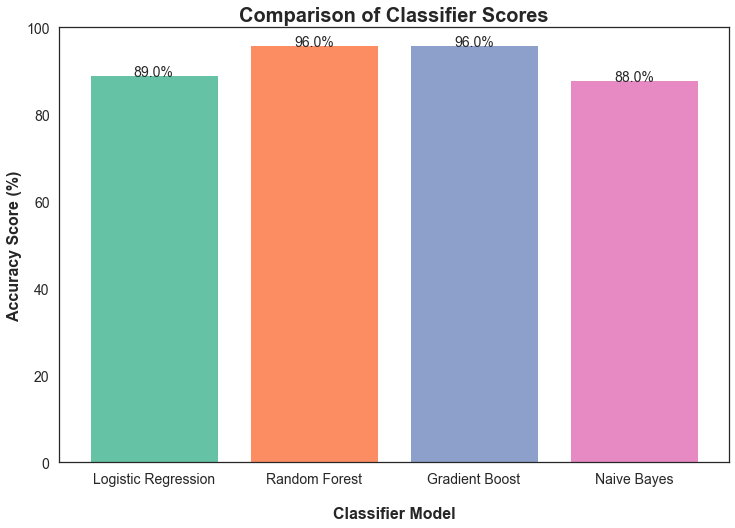

In [57]:
# Plot scores
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(labels, rounded_scores, color=colors)
ax.set_title("Comparison of Classifier Scores", fontsize=20, fontweight='bold')
ax.set_xlabel("Classifier Model", fontsize=16, fontweight='bold')
ax.set_ylabel("Accuracy Score (%)", fontsize=16, fontweight='bold')
ax.set_ylim([0, 100])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.labelpad = 20
# Add labels
for i, score in enumerate(rounded_scores):
    ax.text(i, score-1, str(score) + "%", ha='center', va='bottom', fontsize=14)

plt.show()